In [ ]:
# INSTALL KAGALL
!pip install kaggle

In [19]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 76% 124M/163M [00:00<00:00, 1.29GB/s]
100% 163M/163M [00:00<00:00, 1.17GB/s]


In [21]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [22]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [23]:
#importing dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [24]:
#check first and last 5 image in folder
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_998.jpg', 'with_mask_1817.jpg', 'with_mask_2642.jpg', 'with_mask_1255.jpg', 'with_mask_2797.jpg']
['with_mask_1109.jpg', 'with_mask_1829.jpg', 'with_mask_3539.jpg', 'with_mask_3037.jpg', 'with_mask_1566.jpg']


In [25]:

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])


['without_mask_2403.jpg', 'without_mask_2087.jpg', 'without_mask_11.jpg', 'without_mask_1590.jpg', 'without_mask_1060.jpg']
['without_mask_3261.jpg', 'without_mask_3243.jpg', 'without_mask_2234.jpg', 'without_mask_2316.jpg', 'without_mask_1199.jpg']


In [27]:
# check total no of image in each folder
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


create labelesfor two classes
with mask== 1
without mask ==0

In [28]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [29]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [30]:
#verfing
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [31]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying the images

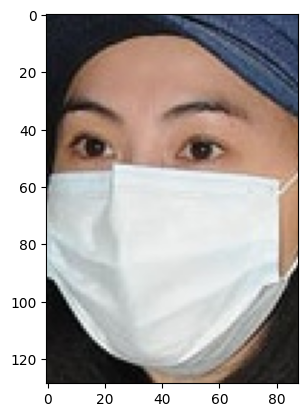

In [32]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1445.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2316.jpg')
imgplot = plt.imshow(img)
plt.show()

converting img into numpy arrays

In [33]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
type(data)

list

In [35]:
len(data)

7553

array([[[ 43,  33,  23],
        [ 43,  33,  23],
        [ 44,  34,  24],
        ...,
        [ 74,  61,  52],
        [ 85,  72,  63],
        [ 91,  77,  68]],

       [[ 44,  34,  24],
        [ 44,  34,  24],
        [ 44,  34,  24],
        ...,
        [ 75,  62,  53],
        [ 86,  72,  63],
        [ 91,  77,  68]],

       [[ 44,  34,  24],
        [ 44,  34,  24],
        [ 43,  33,  24],
        ...,
        [ 76,  63,  54],
        [ 86,  72,  63],
        [ 91,  77,  68]],

       ...,

       [[ 51,  42,  45],
        [ 54,  46,  49],
        [ 59,  53,  55],
        ...,
        [208, 197, 185],
        [114, 105,  96],
        [ 61,  52,  45]],

       [[ 48,  39,  42],
        [ 47,  39,  42],
        [ 47,  41,  43],
        ...,
        [205, 194, 182],
        [112, 103,  94],
        [ 58,  49,  42]],

       [[ 48,  39,  42],
        [ 48,  40,  43],
        [ 49,  43,  45],
        ...,
        [204, 193, 181],
        [112, 103,  94],
        [ 59,  50,  43]]], dtype=uint8)
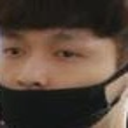

In [36]:
data[0]

In [37]:
type(data[0])

numpy.ndarray

In [38]:
data[0].shape

(128, 128, 3)

In [39]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [40]:
type(X)

numpy.ndarray

In [41]:
type(Y)

numpy.ndarray

In [42]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [43]:
print(Y)

[1 1 1 ... 0 0 0]


train test split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [45]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [47]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.6745098 , 0.56470588, 0.3254902 ],
        [0.69411765, 0.58039216, 0.3372549 ],
        [0.70588235, 0

building convolutional neural network (CNN)

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [52]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - acc: 0.6935 - loss: 0.6418 - val_acc: 0.8694 - val_loss: 0.2913
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - acc: 0.8737 - loss: 0.3038 - val_acc: 0.8711 - val_loss: 0.2485
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9053 - loss: 0.2336 - val_acc: 0.9025 - val_loss: 0.2381
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9103 - loss: 0.2101 - val_acc: 0.9174 - val_loss: 0.2159
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9260 - loss: 0.1736 - val_acc: 0.9223 - val_loss: 0.1842


Model Evalution

In [53]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9262 - loss: 0.1925
Test Accuracy = 0.9232296347618103


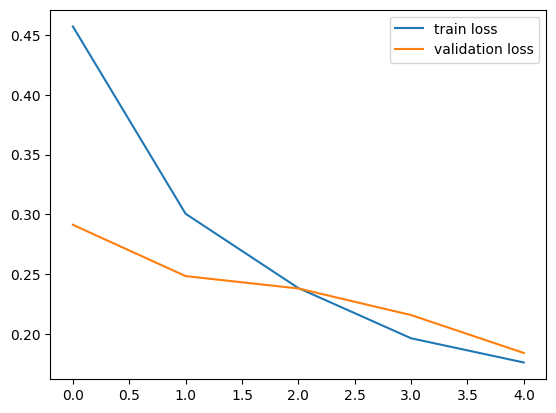

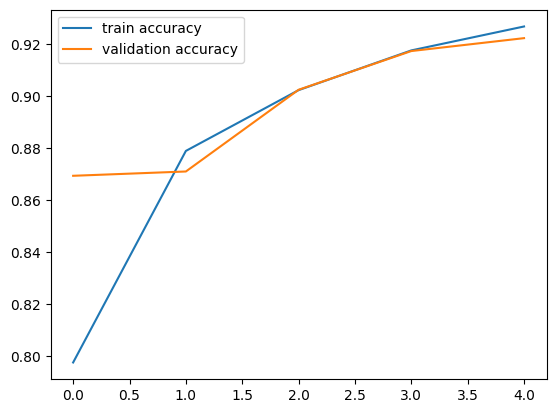

In [54]:
#visulization
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test 0.jpg


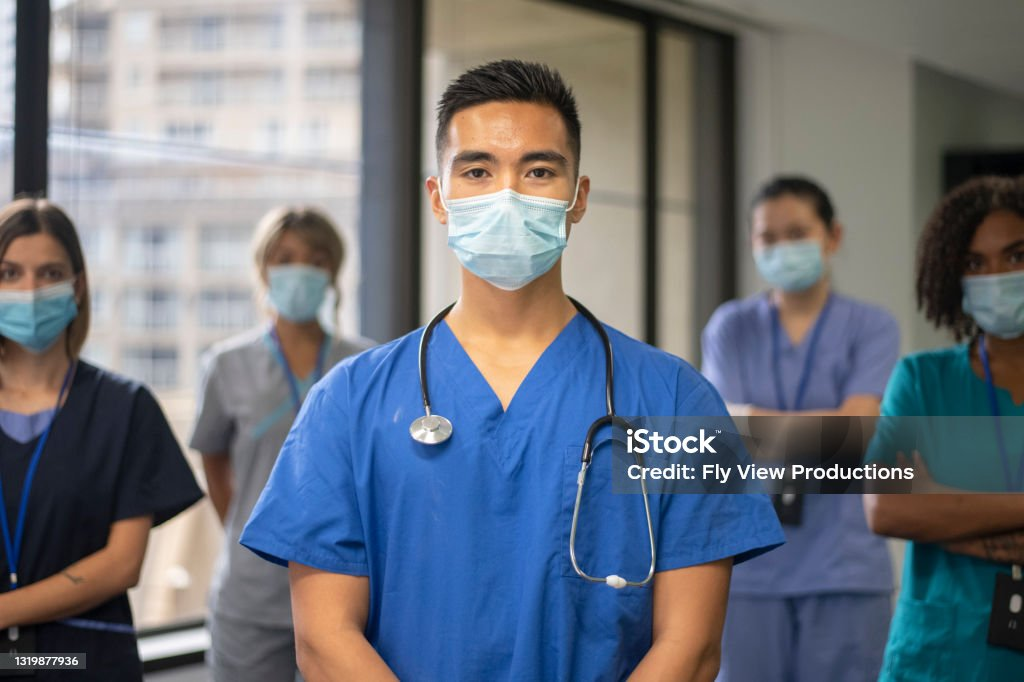

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.5254348  0.30342457]]
0
The person in the image is wearing a mask


In [64]:
#predicativte data
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test 1.jpg


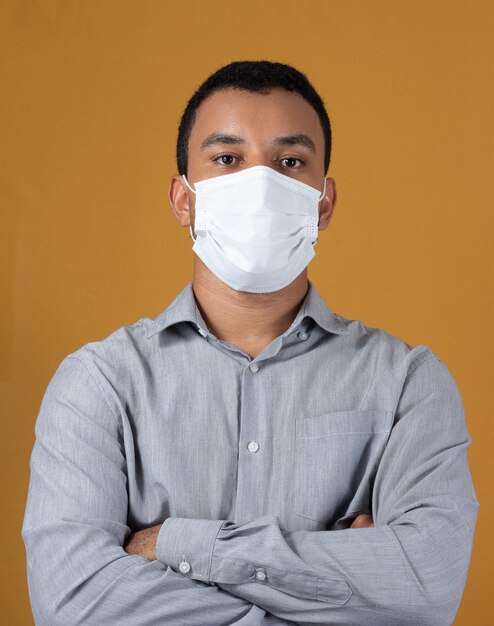

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.4481864 0.3919371]]
0
The person in the image is wearing a mask


In [65]:
#predicativte data
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test 2.jpg


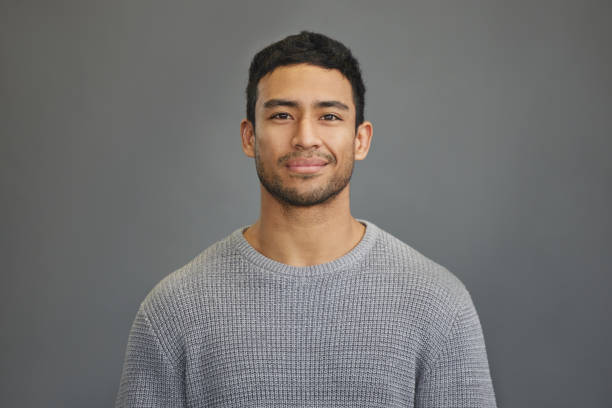

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.4523014  0.49046165]]
1
The person in the image is not wearing a mask


In [66]:
#predicativte data
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test_img.jpg


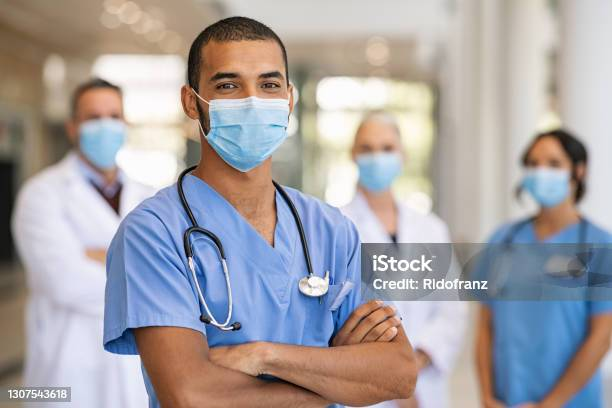

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.4331211  0.42477298]]
0
The person in the image is wearing a mask


In [67]:
#predicativte data
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')